<a href="https://colab.research.google.com/github/vivekml2/MachineLearning/blob/main/PreditCreditCardDefault.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#pip install lime

In [7]:
# Importing ML algorithms
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error, accuracy_score,confusion_matrix, roc_curve, auc,classification_report, recall_score, precision_score, f1_score,roc_auc_score,auc,roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [8]:
# import required libraries


import tensorflow as tf
import keras
import keras.backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import models
from keras import layers

import pandas as pd
import numpy as np
import math
from scipy.stats import kurtosis
from scipy import stats, special
from scipy.stats import skew
import shap

from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

In [9]:
#Ignore warnings

import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore')


In [10]:
# Display all rows and columns of a dataframe

pd.set_option('display.max_columns',15)
pd.set_option('display.max_rows',1000)

In [11]:
# Reading the training data set

df = pd.read_csv('/content/cs-training.csv')
df.shape

(150000, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [13]:
df.head(20)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [14]:
# What percentage of data is missing in the feature

round(df.isnull().sum(axis=0)/len(df),2)*100

# Looks like monthly income has 20% of missing data and 3% missing in number of Dependents

Unnamed: 0                               0.0
SeriousDlqin2yrs                         0.0
RevolvingUtilizationOfUnsecuredLines     0.0
age                                      0.0
NumberOfTime30-59DaysPastDueNotWorse     0.0
DebtRatio                                0.0
MonthlyIncome                           20.0
NumberOfOpenCreditLinesAndLoans          0.0
NumberOfTimes90DaysLate                  0.0
NumberRealEstateLoansOrLines             0.0
NumberOfTime60-89DaysPastDueNotWorse     0.0
NumberOfDependents                       3.0
dtype: float64

In [15]:
#Checking unique number of borrowers, Entire set of data set is unique borrowers(1), before that convert unnamed columns to as 0
df['Unnamed: 0'].nunique()/len(df)
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [16]:
# convert unnamed columns rename to customer ID
df.rename(columns = {'Unnamed: 0' : 'CustomerID'},inplace=True)
df.columns

Index(['CustomerID', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [17]:
# Target Variable
print(df['SeriousDlqin2yrs'].unique())
print()
print('{}% of the borrowers falling in the serious delinquency'
.format((df['SeriousDlqin2yrs'].sum()/len(df))*100))
 

[1 0]

6.683999999999999% of the borrowers falling in the serious delinquency


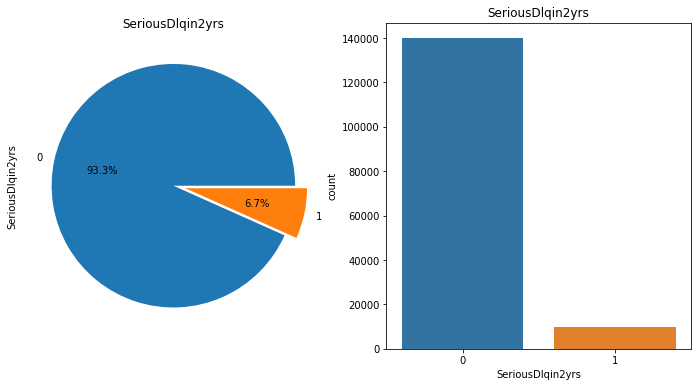

In [18]:
fig,axes = plt.subplots(1,2,figsize=(12,6) )
df['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('SeriousDlqin2yrs')
sns.countplot('SeriousDlqin2yrs', data=df, ax=axes[1])
axes[1].set_title('SeriousDlqin2yrs')
plt.show()

#This is clearly class imbalance problem

In [19]:
df['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [20]:
df.describe()

,CustomerID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [21]:

data = df.drop(columns=['SeriousDlqin2yrs'],axis=1)

In [22]:
y = df['SeriousDlqin2yrs']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Splitting the dataset into train and test validation
df_test, df_train, y_test, y_train = train_test_split(data,y, test_size= 0.8, random_state=42, stratify= y)
df_test.shape, df_train.shape

((30000, 11), (120000, 11))

In [25]:
print('Event rate in the training dataset : ', np.mean(y_train))
print()
print('Event rate in the test dataset :', np.mean(y_test))
print()
print('Event rate in the entire dataset:', np.mean(y))


Event rate in the training dataset :  0.06684166666666666

Event rate in the test dataset : 0.06683333333333333

Event rate in the entire dataset: 0.06684


In [26]:
train = pd.concat([df_train, y_train], axis=1)
train.shape

(120000, 12)

In [27]:
test = pd.concat([df_test, y_test], axis=1)
test.shape

(30000, 12)

In [28]:
# Univariate Analysis using Training Numerical dataset

def plot_hist_boxplot(column):
  fig, [ax1,ax2] = plt.subplots(1,2, figsize=(12,5))
  sns.distplot(train[train[column].notnull()][column],ax=ax1)
  sns.boxplot(y=train[train[column].notnull()][column],ax=ax2)
  print("Skewness : ", skew(train[train[column].notnull()][column]))
  print("kurtosis : ", kurtosis(train[train[column].notnull()][column]))
  plt.show()

In [29]:
def plot_count_boxplot(column):
  fig, [ax1,ax2] = plt.subplots(1,2, figsize=(12,6))
  sns.countplot(train[train[column].notnull()][column],ax=ax1)
  sns.boxplot(y=train[train[column].notnull()][column],ax=ax2)
  print("Skewness : ", skew(train[train[column].notnull()][column]))
  print("kurtosis : ", kurtosis(train[train[column].notnull()][column]))
  plt.show()


Skewness :  104.51383625945637
kurtosis :  16544.639125909292


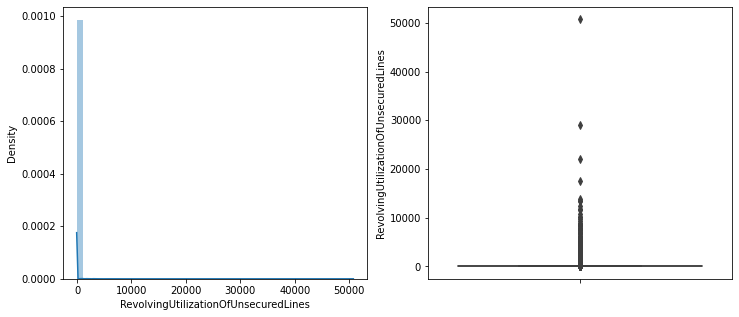

In [30]:
plot_hist_boxplot('RevolvingUtilizationOfUnsecuredLines')

Skewness :  0.1883379862757487
kurtosis :  -0.4989842553901078


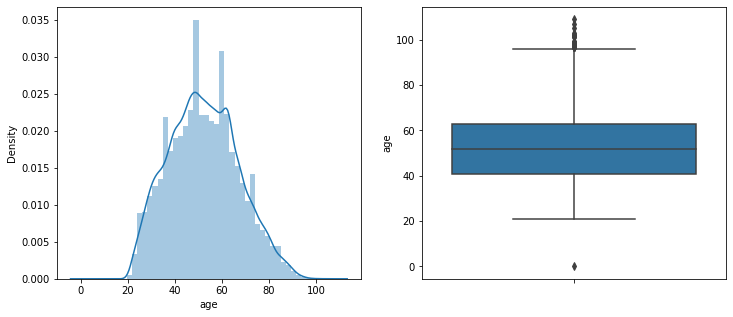

In [31]:
plot_hist_boxplot('age')

Skewness :  95.78845308753385
kurtosis :  14212.893907176613


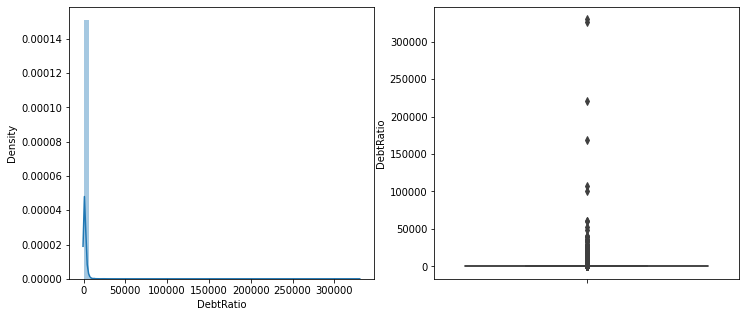

In [32]:
plot_hist_boxplot('DebtRatio')

Skewness :  117.98020100894865
kurtosis :  19658.712451467025


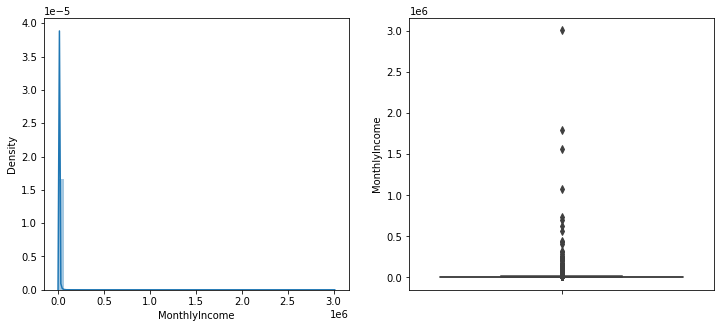

In [33]:
plot_hist_boxplot('MonthlyIncome')

Skewness :  1.2145901173605567
kurtosis :  3.114685912968633


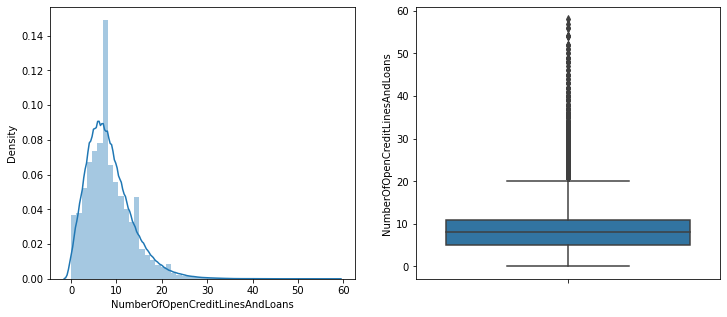

Skewness :  22.56005009391927
kurtosis :  520.5861400129826


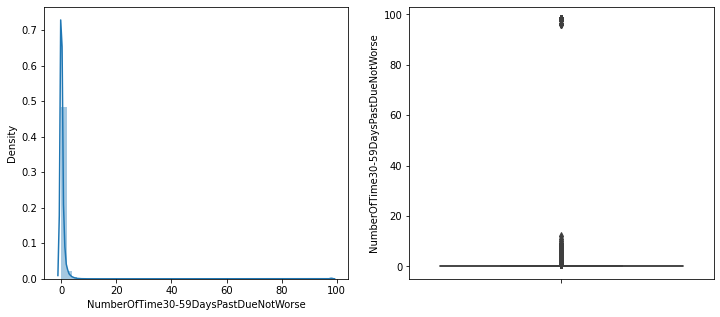

Skewness :  95.78845308753385
kurtosis :  14212.893907176613


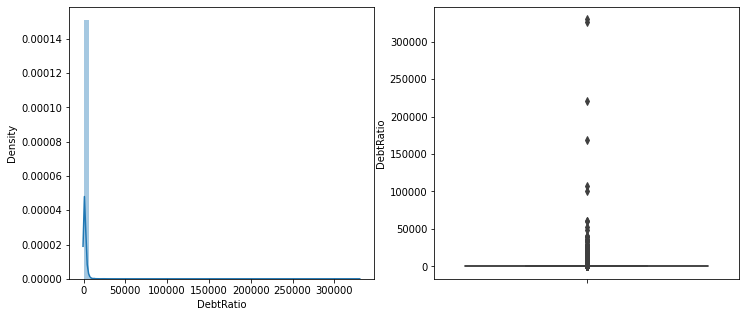

Skewness :  117.98020100894865
kurtosis :  19658.712451467025


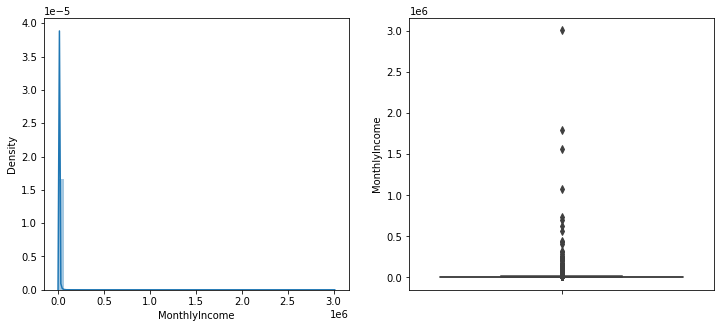

Skewness :  23.0371547196054
kurtosis :  535.4918343524778


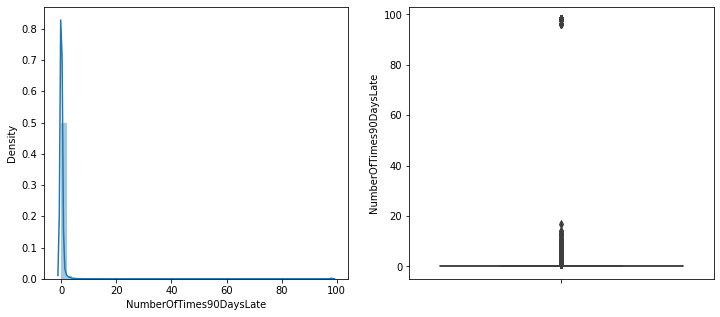

Skewness :  3.635466187390173
kurtosis :  67.79380246787325


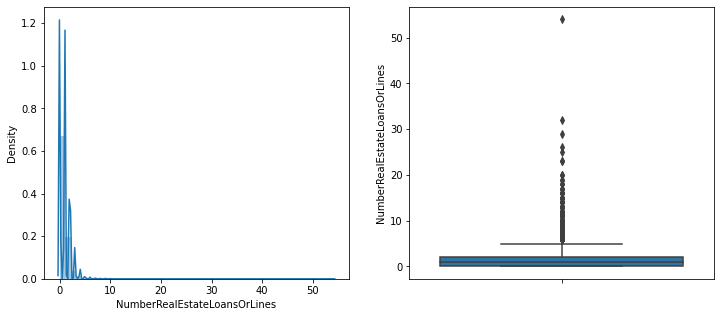

Skewness :  23.287569502079286
kurtosis :  543.6121286456557


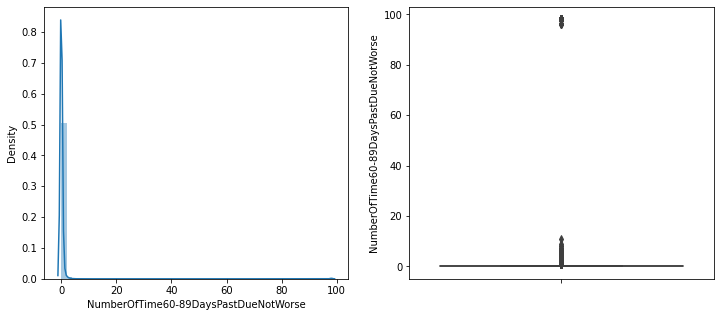

Skewness :  1.5991497659767622
kurtosis :  3.1681417562669285


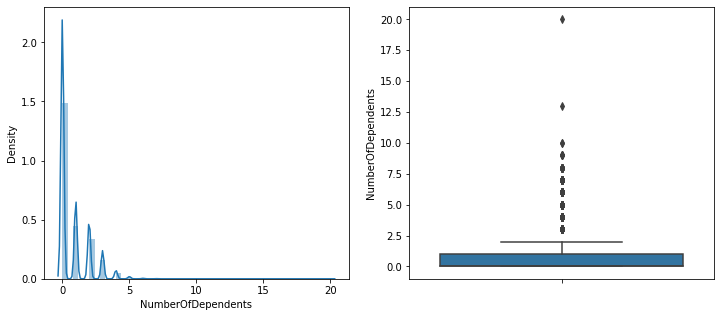

In [34]:
plot_hist_boxplot('NumberOfOpenCreditLinesAndLoans')
plot_hist_boxplot('NumberOfTime30-59DaysPastDueNotWorse')
plot_hist_boxplot('DebtRatio')
plot_hist_boxplot('MonthlyIncome')
plot_hist_boxplot('NumberOfTimes90DaysLate')
plot_hist_boxplot('NumberRealEstateLoansOrLines')
plot_hist_boxplot('NumberOfTime60-89DaysPastDueNotWorse')
plot_hist_boxplot('NumberOfDependents')
#data.columns

In [35]:
data.columns

Index(['CustomerID', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [36]:
cols_for_stats = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']
skewness = [] ; kurt = []

for column in cols_for_stats:
   skewness.append(skew(train[train[column].notnull()][column]))
   kurt.append(kurtosis(train[train[column].notnull()][column])) 

stats = pd.DataFrame({'Skewness' : skewness, 'Kurtosis' : kurt}, index=[col for col in cols_for_stats])
stats.sort_values(by=['Skewness'], ascending=False)
        

,Skewness,Kurtosis
MonthlyIncome,117.980201,19658.712451
RevolvingUtilizationOfUnsecuredLines,104.513836,16544.639126
DebtRatio,95.788453,14212.893907
NumberOfTime60-89DaysPastDueNotWorse,23.287570,543.612129
NumberOfTimes90DaysLate,23.037155,535.491834
NumberOfTime30-59DaysPastDueNotWorse,22.560050,520.586140
NumberRealEstateLoansOrLines,3.635466,67.793802
NumberOfDependents,1.599150,3.168142
NumberOfOpenCreditLinesAndLoans,1.214590,3.114686
age,0.188338,-0.498984


In [37]:
# outlier treatement

# In the columns NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse and NumberOfTimes90DaysLate, we see delinquency range 
#beyond 90 which is common across all features

# Treating outliers for the column -- NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse and NumberOfTimes90DaysLate

In [38]:
print("Unique values in '30-59 Days'  values that are more than or equal to 90:",
      np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]
              ['NumberOfTime30-59DaysPastDueNotWorse']  ))

print("Unique values in '60-89 Days when '30-59 Days' values are more than or equal to 90:",
       np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]
                ['NumberOfTime60-89DaysPastDueNotWorse']))

print("Unique values in '90 Days' when '30-59 Days' values are more than or equal to 90:",
       np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]
                ['NumberOfTimes90DaysLate']))

print("Unique values in '30-59 Days'  values that are less than  90:",
      np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']<90]
                ['NumberOfTime30-59DaysPastDueNotWorse']))

print("Unique values in '60-89 Days when '30-59 Days' values that are less than 90:",
       np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']<90]
                ['NumberOfTime60-89DaysPastDueNotWorse']))

print("Unique values in '90 Days' when '30-59 Days' values that are less than 90:",
       np.unique(train[train['NumberOfTime30-59DaysPastDueNotWorse']<90]
                ['NumberOfTimes90DaysLate']))

print("Proportion of positive class with special 96/96 values:",
       round(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]
     ['SeriousDlqin2yrs'].sum()*100/
     len(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]['SeriousDlqin2yrs']),2,),'%')      



Unique values in '30-59 Days'  values that are more than or equal to 90: [96 98]
Unique values in '60-89 Days when '30-59 Days' values are more than or equal to 90: [96 98]
Unique values in '90 Days' when '30-59 Days' values are more than or equal to 90: [96 98]
Unique values in '30-59 Days'  values that are less than  90: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Unique values in '60-89 Days when '30-59 Days' values that are less than 90: [ 0  1  2  3  4  5  6  7  8  9 11]
Unique values in '90 Days' when '30-59 Days' values that are less than 90: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 17]
Proportion of positive class with special 96/96 values: 55.56 %


In [39]:
# 96 AND 98 values can be viewed as accounting errors. Hence, we would replace them with the maximum value before 96 i.e.12, 11 and 17

train.loc[train['NumberOfTime30-59DaysPastDueNotWorse']>=90, 'NumberOfTime30-59DaysPastDueNotWorse'] =12

train.loc[train['NumberOfTime60-89DaysPastDueNotWorse']>=90, 'NumberOfTime60-89DaysPastDueNotWorse'] =11

train.loc[train['NumberOfTimes90DaysLate']>=90, 'NumberOfTimes90DaysLate'] =17

In [40]:
print("Unique values in 30-59Days", np.unique(train['NumberOfTime30-59DaysPastDueNotWorse']))
print("Unique values in 60-89Days", np.unique(train['NumberOfTime60-89DaysPastDueNotWorse']))
print("Unique values in 90 Days", np.unique(train['NumberOfTimes90DaysLate']))

Unique values in 30-59Days [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Unique values in 60-89Days [ 0  1  2  3  4  5  6  7  8  9 11]
Unique values in 90 Days [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 17]


In [41]:
# Lets repeat this process for test data set

print("Unique values in '30-59 Days'  values that are more than or equal to 90:",
      np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']>=90]
              ['NumberOfTime30-59DaysPastDueNotWorse']  ))

print("Unique values in '60-89 Days when '30-59 Days' values are more than or equal to 90:",
       np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']>=90]
                ['NumberOfTime60-89DaysPastDueNotWorse']))

print("Unique values in '90 Days' when '30-59 Days' values are more than or equal to 90:",
       np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']>=90]
                ['NumberOfTimes90DaysLate']))

print("Unique values in '30-59 Days'  values that are less than  90:",
      np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']<90]
                ['NumberOfTime30-59DaysPastDueNotWorse']))

print("Unique values in '60-89 Days when '30-59 Days' values that are less than 90:",
       np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']<90]
                ['NumberOfTime60-89DaysPastDueNotWorse']))

print("Unique values in '90 Days' when '30-59 Days' values that are less than 90:",
       np.unique(test[test['NumberOfTime30-59DaysPastDueNotWorse']<90]
                ['NumberOfTimes90DaysLate']))

print("Proportion of positive class with special 96/96 values:",
       round(test[test['NumberOfTime30-59DaysPastDueNotWorse']>=90]
     ['SeriousDlqin2yrs'].sum()*100/
     len(test[test['NumberOfTime30-59DaysPastDueNotWorse']>=90]['SeriousDlqin2yrs']),2,),'%')   

Unique values in '30-59 Days'  values that are more than or equal to 90: [98]
Unique values in '60-89 Days when '30-59 Days' values are more than or equal to 90: [98]
Unique values in '90 Days' when '30-59 Days' values are more than or equal to 90: [98]
Unique values in '30-59 Days'  values that are less than  90: [ 0  1  2  3  4  5  6  7  8  9 10 12 13]
Unique values in '60-89 Days when '30-59 Days' values that are less than 90: [0 1 2 3 4 5 6 7]
Unique values in '90 Days' when '30-59 Days' values that are less than 90: [ 0  1  2  3  4  5  6  7  8  9 10 11 15]
Proportion of positive class with special 96/96 values: 50.94 %


In [42]:
test.loc[test['NumberOfTime30-59DaysPastDueNotWorse'] >=90, 'NumberOfTime30-59DaysPastDueNotWorse'] =13
test.loc[test['NumberOfTime60-89DaysPastDueNotWorse'] >=90, 'NumberOfTime60-89DaysPastDueNotWorse'] = 7
test.loc[test['NumberOfTimes90DaysLate']>=90, 'NumberOfTimes90DaysLate'] = 15

print("Unique values in 30-59Days", np.unique(test['NumberOfTime30-59DaysPastDueNotWorse']))
print("Unique values in 60-89Days", np.unique(test['NumberOfTime60-89DaysPastDueNotWorse']))
print("Unique values in 90 Days", np.unique(test['NumberOfTimes90DaysLate']))

Unique values in 30-59Days [ 0  1  2  3  4  5  6  7  8  9 10 12 13]
Unique values in 60-89Days [0 1 2 3 4 5 6 7]
Unique values in 90 Days [ 0  1  2  3  4  5  6  7  8  9 10 11 15]


In [43]:
# Checking for DebtRatio and RevolvingUtilizationOfUnsecuredLines.

print('Debt Ratio : \n', train['DebtRatio'].describe())
print('\nRevolving Utilization of Unsecured Lines:\n',
      train['RevolvingUtilizationOfUnsecuredLines'].describe())

Debt Ratio : 
 count    120000.000000
mean        350.913763
std        1985.649364
min           0.000000
25%           0.174335
50%           0.365643
75%           0.866853
max      329664.000000
Name: DebtRatio, dtype: float64

Revolving Utilization of Unsecured Lines:
 count    120000.000000
mean          5.986096
std         251.444207
min           0.000000
25%           0.029737
50%           0.154659
75%           0.559328
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64


In [44]:
#This data is right skewed. So, our main aim would be to check the potential outliiers beyond 95% quantities. However, since our data is 120,000.
#Let's consider 95% and 97.5% and 97.5% quantities for our further analysis.

In [45]:
train[train['DebtRatio'] >= train['DebtRatio'].quantile(0.95)][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,6002.000000,308.000000
mean,0.054315,0.077922
std,0.226658,0.268485
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


Observations

Out of  6002 customers falling in last 5 percentil of data the number of times their debt is highter than their income, only 308 have monthly income values

The max of monthly income is 1 and min is 0 which makes us wonder that are data entry errors. Let's check whether the Serious Delinquency in 2 years and Monthly Income values are equal

In [46]:
train[(train["DebtRatio"] > train["DebtRatio"].quantile(0.95)) & (train['SeriousDlqin2yrs'] == train['MonthlyIncome'])].shape[0]

271

In [47]:
# Hence, our suspects are true and there are 271 out of 308 rows where Monthly Income is qual to Serious Deliquencies in 2 years. 
#Hence we will remove these 271 outliers from our analysis as their current values aren't useful for our predictve modeling and
#will add to the bias and variance

In [48]:
new_train = train[-((train["DebtRatio"] > train["DebtRatio"].quantile(0.95)) & (train['SeriousDlqin2yrs'] == train['MonthlyIncome']))]
new_train.shape

(119729, 12)

In [49]:
# Revolving Utilization of Unsecured Lines
#This field basically represents the ratio of the amount owed by the credit limit of a customer.
#A ratio highter than 1 is considered to be a serious defaulter.
#A Ratio of 10 functionality also seems possible, let's see how many of these customers have the
#Revolving Utilization of Unsecured lines greater than 0

In [50]:
new_train[new_train['RevolvingUtilizationOfUnsecuredLines']>10].describe()

,CustomerID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,187.000000,187.000000,187.000000,187.000000,187.000000,133.000000,187.000000,187.000000,187.000000,187.000000,179.000000,187.000000
mean,78422.989305,3634.411136,50.989305,0.176471,522.932048,9020.067669,5.614973,0.080214,1.208556,0.080214,0.687151,0.048128
std,40921.820372,5247.138619,14.651136,0.544654,1205.632700,7156.622316,3.100709,0.646732,1.094626,0.603737,1.045269,0.214612
min,294.000000,14.000000,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44759.500000,953.000000,39.000000,0.000000,0.217823,5000.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,80200.000000,2120.000000,49.000000,0.000000,0.381491,7083.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,113817.000000,4240.000000,63.000000,0.000000,90.000000,10575.000000,7.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,149161.000000,50708.000000,87.000000,3.000000,6820.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000,1.000000


In [51]:
new_train = new_train[new_train['RevolvingUtilizationOfUnsecuredLines']<=10]
new_train.shape

(119542, 12)

In [52]:
new_test = test[test['RevolvingUtilizationOfUnsecuredLines']<=10]
new_test.shape

(29946, 12)

In [53]:
new_train[['age','SeriousDlqin2yrs']].describe()

,age,SeriousDlqin2yrs
count,119542.000000,119542.000000
mean,52.296130,0.067006
std,14.775558,0.250033
min,0.000000,0.000000
25%,41.000000,0.000000
50%,52.000000,0.000000
75%,63.000000,0.000000
max,109.000000,1.000000


In [54]:
#It can be observed that the data includes a record with age= 0 which is not a valid age, updating the recod with mode age.

In [55]:
new_train[new_train['age']<1]

,CustomerID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
65695,65696,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0,0


In [56]:
new_train.loc[new_train['age'] == 0, 'age'] = new_train.age.mode()[0]

In [57]:
new_train['age'].min()

21

In [58]:
new_test[new_test['age']<1]

#so there is no age less than 1 in testing data set

,CustomerID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs


In [59]:
# Monthly income is integer value, Replace with nulls with the median values instead of mean as it was heavily right skewed
# Number of Dependents can be characterized as a categorical variable, hence if customers have NA for number of dependents,
# it means that they dont have any depndents. Filling either by mode which is 0 or by the above assumption is the same. Therefore
# fill them with zeros

In [60]:
def MissingHanlder(df):
  DataMissing = df.isnull().sum()*100/len(df)
  DataMissingByColumn = pd.DataFrame({'Percentage Nulls': DataMissing})
  DataMissingByColumn.sort_values(by='Percentage Nulls', ascending=False,inplace=True)
  return DataMissingByColumn[DataMissingByColumn['Percentage Nulls']>0]

MissingHanlder(new_train)  

,Percentage Nulls
MonthlyIncome,19.820649
NumberOfDependents,2.612471


In [61]:
new_train['MonthlyIncome'].fillna(new_train['MonthlyIncome'].median(), inplace= True)
new_train['NumberOfDependents'].fillna(0,inplace=True)

new_test['MonthlyIncome'].fillna(new_train['MonthlyIncome'].median(), inplace= True)
new_test['NumberOfDependents'].fillna(0,inplace=True)

In [62]:
#Rechecking Nulls

MissingHanlder(new_test)

,Percentage Nulls


In [63]:
MissingHanlder(new_train)

,Percentage Nulls


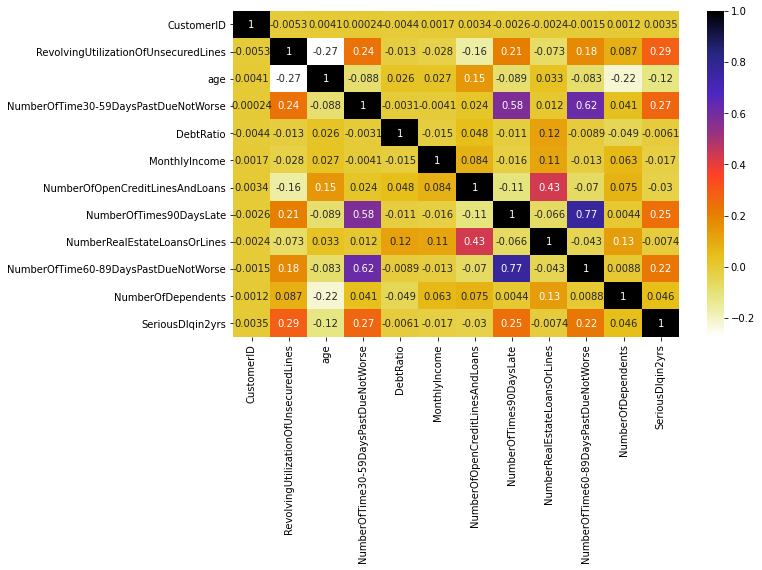

In [64]:
#Correlation Plot
plt.figure(figsize=(10,6))
sns.heatmap(new_train.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [65]:
# BiVariate Analysis

def boxplot_violinplot(col1,col2):
  fig,[ax1,ax2] = plt.subplots(1,2,figsize=(12,5))
  sns.boxplot(x=col1, y=col2, data=new_train, palette='Set3', ax=ax1)
  sns.violinplot(x=col1, y=col2, data=new_train, palette='Set3',ax=ax2)
  plt.show()

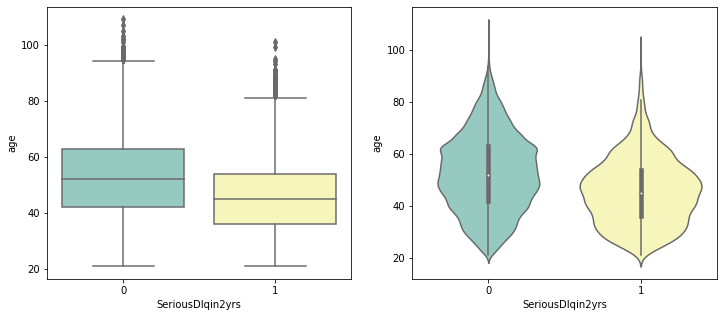

In [66]:
boxplot_violinplot('SeriousDlqin2yrs','age')

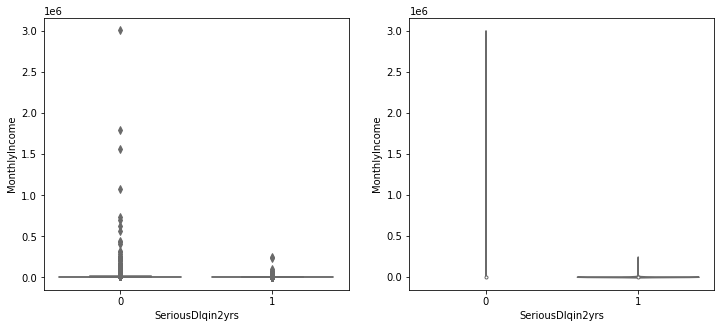

In [67]:
boxplot_violinplot('SeriousDlqin2yrs', 'MonthlyIncome')

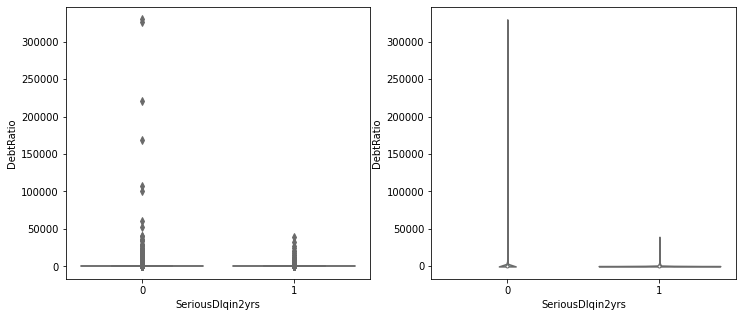

In [68]:
boxplot_violinplot('SeriousDlqin2yrs', 'DebtRatio')

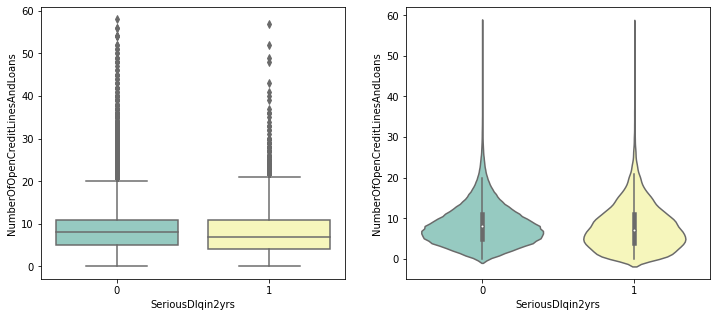

In [69]:
boxplot_violinplot('SeriousDlqin2yrs', 'NumberOfOpenCreditLinesAndLoans')

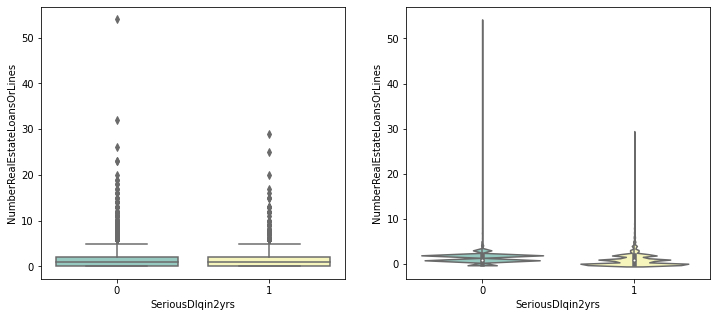

In [70]:
boxplot_violinplot('SeriousDlqin2yrs', 'NumberRealEstateLoansOrLines')

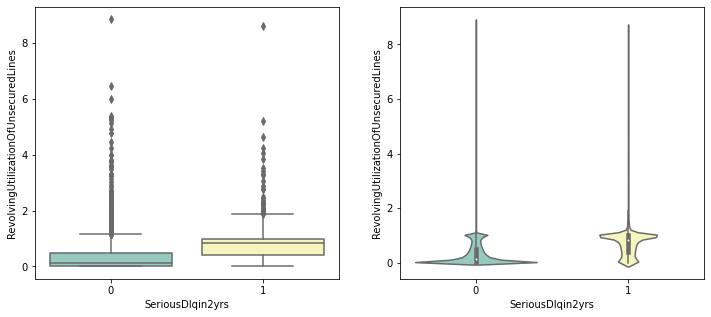

In [71]:
boxplot_violinplot('SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines')

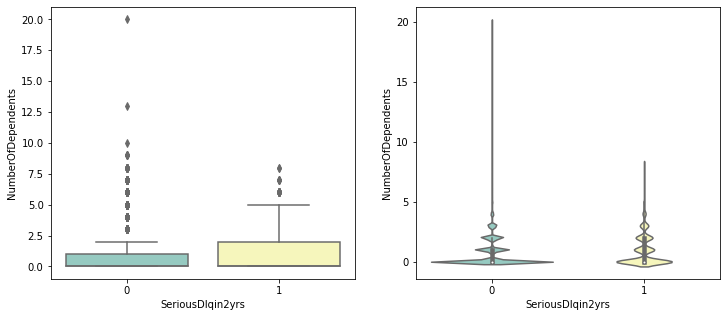

In [72]:
boxplot_violinplot('SeriousDlqin2yrs', 'NumberOfDependents')

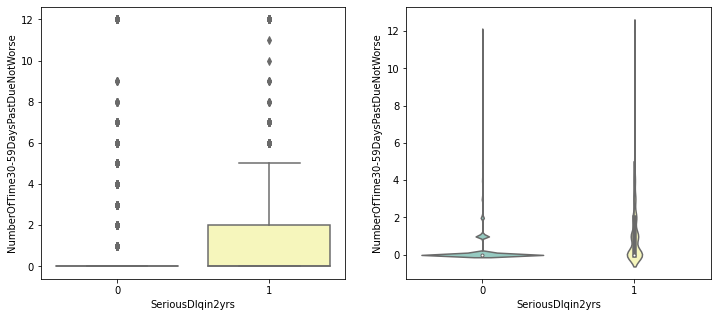

In [73]:
boxplot_violinplot('SeriousDlqin2yrs', 'NumberOfTime30-59DaysPastDueNotWorse')

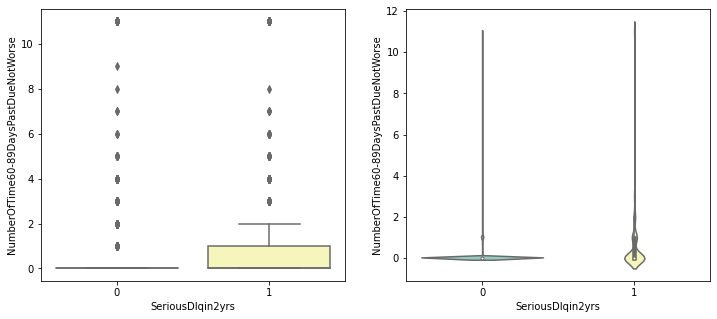

In [74]:
boxplot_violinplot('SeriousDlqin2yrs', 'NumberOfTime60-89DaysPastDueNotWorse')

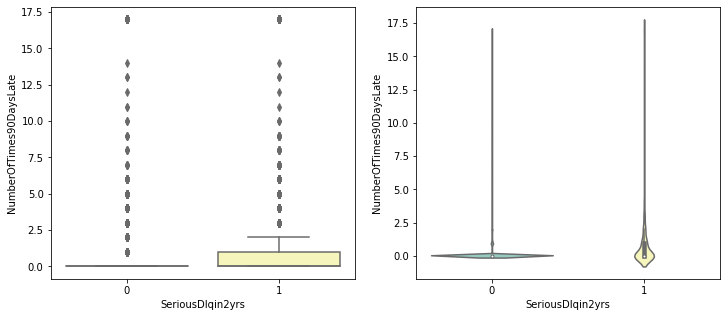

In [75]:
boxplot_violinplot('SeriousDlqin2yrs', 'NumberOfTimes90DaysLate')

In [76]:
#Feature Engineering

dataset = [new_train, new_test]


In [77]:
for data in dataset:
  data['CombinedPastDue'] =  data['NumberOfTime30-59DaysPastDueNotWorse'] + data['NumberOfTime60-89DaysPastDueNotWorse'] + data['NumberOfTimes90DaysLate']
  data['CombinedCreditLoans'] = data['NumberOfOpenCreditLinesAndLoans'] + data ['NumberRealEstateLoansOrLines']

new_train.columns  


Index(['CustomerID', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs', 'CombinedPastDue',
       'CombinedCreditLoans'],
      dtype='object')

In [78]:
for data in dataset:
  data['MonthlyIncomePerPerson'] = data ['MonthlyIncome'] / (data['NumberOfDependents']+1)
  data['MonthlyDebt'] = data['MonthlyIncome']*data['DebtRatio']
  data['isRetired']   = np.where((data['age'] > 65),1,0)
  data['RevolvingLines'] = data['NumberOfOpenCreditLinesAndLoans'] - data['NumberRealEstateLoansOrLines']
  data['hasReolvingLines'] = np.where((data['RevolvingLines']>0),1,0)
  data['hasMutipleRealEstates'] = np.where((data['NumberRealEstateLoansOrLines']>=2),1,0)
  data['isAlone'] = np.where((data['NumberOfDependents']==0),1,0)

new_train.columns  


Index(['CustomerID', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs', 'CombinedPastDue',
       'CombinedCreditLoans', 'MonthlyIncomePerPerson', 'MonthlyDebt',
       'isRetired', 'RevolvingLines', 'hasReolvingLines',
       'hasMutipleRealEstates', 'isAlone'],
      dtype='object')

Tacking Class imbalance Problem using:

Upsampling the minority class(Default rate)
Downsampling the majority class(non defaulters)
SMOTE - Synthetic Sampling

In [79]:
df_train = new_train.drop(columns=['CustomerID','SeriousDlqin2yrs'],axis=1)
y_train = new_train['SeriousDlqin2yrs']

df_test= new_test.drop(columns=['CustomerID','SeriousDlqin2yrs'],axis=1)
y_test= new_test['SeriousDlqin2yrs']

In [80]:
# Upsampling
df_majority = new_train[new_train['SeriousDlqin2yrs']==0]
df_minority = new_train[new_train['SeriousDlqin2yrs']==1]

In [81]:
# replacing the samples keeping 100000 as the defaulters to keep in line with the non defaulters

df_minority_upsampled = resample(df_minority,replace=True, n_samples=100000,random_state=42)
df_minority_upsampled = resample(df_minority,replace=True, n_samples=100000,random_state=42)
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
df_upsampled['SeriousDlqin2yrs'].value_counts()

0    111532
1    100000
Name: SeriousDlqin2yrs, dtype: int64

In [82]:
# Downsampling

new_train['SeriousDlqin2yrs'].value_counts()

0    111532
1      8010
Name: SeriousDlqin2yrs, dtype: int64

In [83]:
df_majority_downsampled  = resample(df_majority,n_samples=8000,random_state=42)
df_downsampled = pd.concat([df_minority,df_majority_downsampled])
df_downsampled['SeriousDlqin2yrs'].value_counts()

1    8010
0    8000
Name: SeriousDlqin2yrs, dtype: int64

In [84]:
y_train_downsampled = df_downsampled['SeriousDlqin2yrs']

df_downsampled.drop(columns=['CustomerID','SeriousDlqin2yrs'],axis=1,inplace=True)
df_downsampled.shape, df_test.shape, y_train_downsampled.shape, y_test.shape

((16010, 19), (29946, 19), (16010,), (29946,))

In [85]:
# SMOTE

smote = SMOTE(sampling_strategy= 'minority', k_neighbors=2, random_state=42)
#os- ordered sampling
os_data_X,os_data_y = smote.fit_resample(df_train,y_train)

In [147]:
os_data_X.shape, sum(os_data_X)/len(os_data_y)

((223064, 19),
 array([5.06358066e-01, 4.92308221e+01, 6.66234462e-01, 3.20216627e+02,
        6.03427246e+03, 8.17574897e+00, 4.85542529e-01, 9.99838653e-01,
        3.00554043e-01, 8.15072754e-01, 1.45233103e+00, 9.17558763e+00,
        4.24115280e+03, 1.66519043e+06, 1.32190771e-01, 7.17591032e+00,
        9.66912564e-01, 2.66892968e-01, 5.70921348e-01]))

In [155]:
# Making a copy of the dataframes so that transformed df and original 
#df is separate to compare results

os_data_X_transformed = os_data_X.copy()
df_test_transformed = df_test.copy()
df_test_transformed.count


<bound method DataFrame.count of         RevolvingUtilizationOfUnsecuredLines  age  \
147386                              1.000000   45   
104611                              0.586490   41   
139320                              0.014679   63   
119583                              0.542555   41   
37763                               0.168025   49   
...                                      ...  ...   
18048                               0.004136   41   
3895                                0.000000   49   
12547                               0.207752   44   
62173                               0.012718   64   
33169                               0.000584   39   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
147386                                     0   0.166333         2500.0   
104611                                     1   0.267449         5200.0   
139320                                     0   0.010198         5000.0   
119583                            

In [88]:
df_test_standardized = df_test.copy()

In [89]:
df_downsampled_transformed = df_downsampled.copy()
df_upsampled_transformed = df_upsampled.copy()

In [90]:
# Scaling of the features so convergence of the model towards global minima can 
#be achieved and training can be done faster.

# Following feauture transformation techniques will be applied
# BoxCox Trasnformations
# Standardization 

In [91]:
# We have to check how skewness changes afer the transofmraions and we will check on SMOTE
# sampling technique dataset

In [149]:
def SkewMeasure(df):
     df2 = pd.DataFrame(df)
     nonObjectColList = df2.dtypes[df2.dtypes != 'object'].index
     skewM = df2[nonObjectColList].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
     skewM=pd.DataFrame({'skew':skewM})
     return skewM[abs(skewM)>0.5].dropna()
     

In [150]:
SkewMeasure(os_data_X_transformed)
#As we can skewness is pretty higher in following results


,skew
4,146.968611
12,105.345969
13,90.058100
3,87.067428
10,7.661323
8,7.411765
6,7.297487
2,4.386892
7,3.592558
14,2.166787


In [160]:
skewM = SkewMeasure(os_data_X_transformed)

for i in skewM.index:
    os_data_X_transformed[i] = special.boxcox1p(os_data_X_transformed[i],0.15) #lambda = 0.15
    #df_test_transformed[i]  = special.boxcox1p(df_test_transformed[i],0.15) #lambda = 0.15
SkewMeasure(os_data_X_transformed)

,skew
4,146.964652
12,105.343210
13,90.060140
3,87.069325
10,7.661383
8,7.411793
6,7.297496
2,4.387083
7,3.592739
14,2.166912


In [145]:
id = [i for i in range(1,len(np.asarray(os_data_X_transformed))+1)]
os_data_X_transformed = np.insert(os_data_X_transformed, 0, id)
print(os_data_X_transformed)

[1. 2. 3. ... 1. 0. 0.]


IndexError: ignored

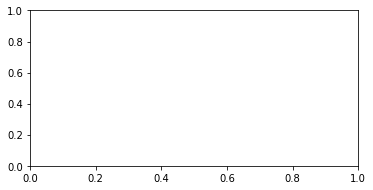

In [135]:
columnList = list(df_test_transformed.columns)

fig = plt.figure(figsize=[20,20])
for col, i in zip(columnList,range(1,19)):
  axes= fig.add_subplot(6,3,i)
  sns.distplot(os_data_X_transformed[col],ax=axes,kde_kws={'bw':1.5},color='purple')
plt.show()